In [1]:
import pandas as pd
import numpy as np

In [2]:
file=r'C:\Users\Aakriti\Desktop\python\Data\Data\bank-full.csv'

In [3]:
data=pd.read_csv(file,delimiter=";")

In [3]:
bd=pd.read_csv(file,delimiter=';')

In [ ]:
bd.describe()

In [ ]:
bd.nunique()

In [ ]:
bd['age'].describe()

In [ ]:
bd['age'].mean(),bd['age'].median()

|Function	|Description|
|-----------|-----------|
|count	|Number of non-null observations|
|sum	|Sum of values|
|mean	|Mean of values|
|mad	|Mean absolute deviation|
|median	|Arithmetic median of values|
|min	|Minimum|
|max	|Maximum|
|mode	|Mode|
|abs	|Absolute Value|
|prod	|Product of values|
|std	|Unbiased standard deviation|
|var	|Unbiased variance|
|sem	|Unbiased standard error of the mean|
|skew	|Unbiased skewness (3rd moment)|
|kurt	|Unbiased kurtosis (4th moment)|
|quantile	|Sample quantile (value at %)|
|cumsum	|Cumulative sum|
|cumprod	|Cumulative product|
|cummax	|Cumulative maximum|
|cummin	|Cumulative minimum|

In [ ]:
bd['job'].value_counts()

In [ ]:
# Exercise
#extract the name of the category for which frequency is minimum
# extract category names for which the frequency is higher than 1500
# make use of index 

In [ ]:
k=bd['job'].value_counts()

In [17]:
k=data["job"].value_counts()

In [ ]:
k.index[k==k.min()]

In [ ]:
k.index[k>1500]

In [ ]:
pd.crosstab(bd['default'],bd['housing'])

In [ ]:
pd.crosstab(bd['default'],bd['housing'],margins=True)

In [ ]:
bd.select_dtypes(['object'])

In [22]:
data.select_dtypes(["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
cat_var=bd.select_dtypes(['object']).columns

In [ ]:
for col in cat_var:
    print(bd[col].value_counts())
    print('~~~~~')

In [ ]:
bd.groupby(['housing','default'])['balance','day'].mean()

In [ ]:
bd.aggregate({'housing':'count','balance':'mean','age':'nunique'})

In [6]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed, it
        is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can c

In [31]:
#pd.pivot_table(bd,values=['housing'],index=['month'],columns='housing',aggfunc=lambda x:len(x))

In [36]:
data.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [39]:
#pd.pivot_table(data,values=["housing"],index=["month"],columns="default",aggfunc=lambda x:len(x))

# Visual Summary with seaborn

In [40]:
import seaborn as sns
%matplotlib inline

## Single Numeric Column

In [ ]:
sns.distplot(bd['age'],kde=False,norm_hist=True,bins=10,hist=True)
# see what various values to these options do

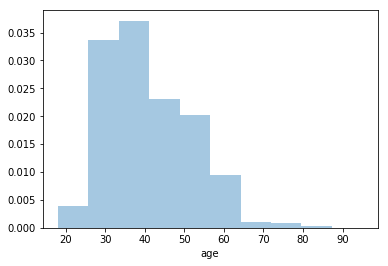

In [44]:
myplot=sns.distplot(data["age"],kde=False,norm_hist=True,bins=10,hist=True)
myfig=myplot.get_figure()

In [ ]:
myplot=sns.distplot(bd['age'],kde=False,norm_hist=True,bins=10,hist=True)
myimg=myplot.get_figure()

In [ ]:
myimg.savefig('output.png')

In [ ]:
sns.kdeplot(bd['pdays'],shade=True)
sns.kdeplot(bd['age'],shade=True)

In [ ]:
sns.boxplot(y='age',data=bd)

In [ ]:
sns.violinplot(y='age',data=bd)

## numeric-numeric

In [ ]:
sns.jointplot(x="age", y="balance", data=bd)

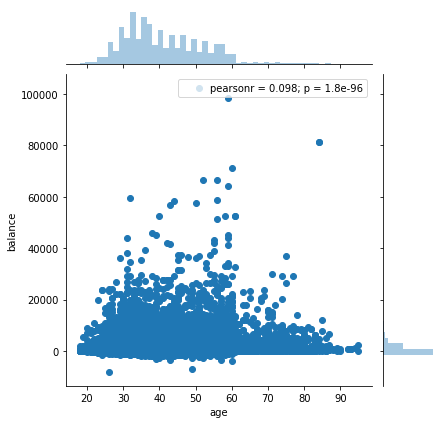

In [46]:
sns.jointplot(x="age",y="balance",data=data)

In [ ]:
sns.jointplot(x="age", y="balance", data=bd.iloc[:100,:],
              kind="hex",size=10,color="g")
# used subset of data to see a more clear plot

In [ ]:
sns.lmplot('age', 'balance', 
           data=bd.iloc[1:100,:],palette="Set1",
           fit_reg=True,order=4)

In [ ]:
sns.lmplot('duration', 'campaign', 
           data=bd.iloc[1:500,:],palette="Set1",
           hue='housing',
           col='default',
           row='loan',
           fit_reg=True)

## Categorical

In [ ]:
sns.countplot(x="education", data=bd)

In [ ]:
sns.countplot(x="education", data=bd,hue='default')

# explore sns.barplot

# Numeric Categorical 

In [ ]:
sns.boxplot(x='age',y='education',data=bd)

# Heatmaps

In [ ]:
bd.corr()

In [ ]:
sns.heatmap(bd.corr())

In [30]:
sns.heatdata.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000
